# Scenario 6 Team 12 MSMPR Continuous process (PBD)

In [150]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import sklearn

### To model our continuous MSMPR process, the following changes are made to the given gPROMS model:

$$ \text{Average (dominant) particle size: } L_D = 1.738 [mm] $$

$$ \text{Initial concentration: } c_{\text{start}} = 25.6 [\dfrac{g}{L}] $$

$$ \text{Initial growth rate: } G_0 = 0.8510 [\dfrac{mm}{s}] $$

$$\text{Vessel volume: } V = 80 [L]$$

### The following dataframe(s) are taken from the simulation result as to plot the Particle Size distribution (PSD):

#### This is the dataframe for the exported excel file from the gPROMS model for concentration c

In [155]:
# Concentration c [g/L] over time t (index i * 10) [s]
df_conc = pd.read_excel("C2_C.xlsx")
#df_conc.head()
#print(df_conc)

#### This is the dataframe for the exported excel file from the gPROMS model for growth rate G

In [156]:
# Growth rate G [mm/s] over time t (index j * 10) [s]
df_Growrate = pd.read_excel("C2_G.xlsx")
#df_Growrate.head()
#print(df_Growrate)

#### This is the dataframe for the exported excel file from the gPROMS model for the number density n

In [157]:
# For the df_n, the columns represent the time (index i * 10) [s]
# The rows represent the characteristic length (index j * 1e-2) [mm]

# Number density n [1 /L / V] over time t (index j * 10) [s]
df_n = pd.read_excel("C2_n.xlsx")
#df_n.head()
#print(df_n)

### We now want to find when the system reaches equilbrium

Such that two concentration values are very close to each other

In [207]:
# decimal_place = 1e-4
# prev = 0
# for i in range(0, 1001):
#     curr = df_conc['C [g/L]'][i]
#     if (abs(curr - prev) <= decimal_place):
#         print(f"Reach Equilibrium at {i*10} [s] with concentration of {curr} [g/L]")
#     else:
#         prev = curr
#         print(f"Current concentration: {curr} [g/L] at {i*10} [s]")
# NOTE: 
# Equilibrium at 7490 [s] with concentration of 13.686361 [g/L] to the fourth decimal place

In [217]:
CNT = len(df[df.columns[0]]) - 1

def findEq(cnt=0, prev=0, decimal_place=1e-4, CNT=CNT, df=df_conc):
    """
    Return the time at which equilbrium is reached
    Chosen 4 decimal place to compare two concentration values [g/L]
    Since 5 decimal place cannot compare as values get too close
    """
    if cnt >= CNT:
        print("Invalid out of range")
        return
    
    curr = df[df.columns[0]][cnt]
    # If the current value and the previous value is close
    if (abs(curr - prev) <= decimal_place):
        return {'Time [s]': cnt * 10, 'Conc [g/L]': curr};
    
    # Else replace prev with current value and recall function
    return findEq(cnt+1, curr)
    
##########################################
q = findEq()
print(q)    

{'Time [s]': 7490, 'Conc [g/L]': 13.686361}


### We now want to plot the particle size distribution (particle size vs characteristic length)

#### At 10% equilbrium

In [218]:
# 10% Equilibrium time [s]
# 749 round up to 750
Eq10_time = 750; # [s]

# list of number density [# crystals / L / V]
n10 = [df_n[Eq10_time][i] for i in range(1000)]


#### At 20% equilbrium

In [219]:
# 20% Equilibrium time [s]
# 1498 round up to 1430
Eq20_time = 1430; # [s]

# list of number density [# crystals / L / V]
n20 = [df_n[Eq20_time][i] for i in range(1000)]

#### At 30% equilbrium

In [220]:
# 30% Equilibrium time [s]
# 2247 round up to 2250
Eq30_time = 2250; # [s]

# list of number density [# crystals / L / V]
n30 = [df_n[Eq30_time][i] for i in range(1000)]

#### At 100% equilbrium

In [221]:
# Equilibrium time [s]
Eq_time = 7490; # [s]

# list of number density [# crystals / L / V]
n = [df_n[Eq_time][i] for i in range(1000)]

# list of characterisitic length of nuclei [mm]
l = [i/100 for i in range(1000)]

## Plot the particle size distribution (particle size vs characteristic length) of the MSMPR process

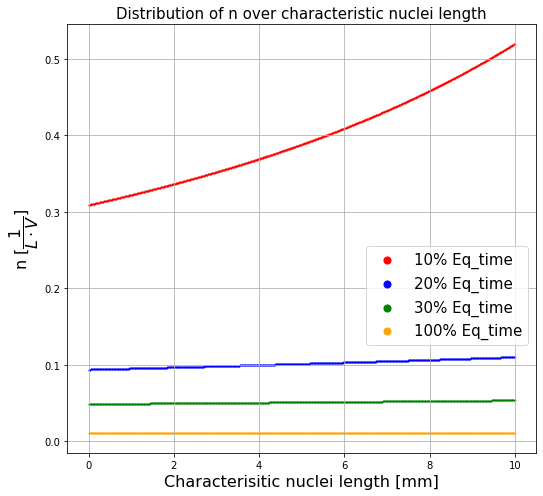

In [223]:
# We can now plot the particle size distribution (particle size vs characteristic length)
(fig, ax1) = plt.subplots(1, figsize=(10, 7))
size = 0.5;
cdict = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}

ax1.scatter(l, n10, s=size,c=cdict[1],label='10% Eq_time' ,vmin=0,vmax=100)
ax1.scatter(l, n20, s=size,c=cdict[2],label='20% Eq_time' ,vmin=0,vmax=100)
ax1.scatter(l, n30, s=size,c=cdict[3],label='30% Eq_time' ,vmin=0,vmax=100)
ax1.scatter(l, n  , s=size,c=cdict[4],label='100% Eq_time',vmin=0,vmax=100)

ax1.set_xlabel(r'Characterisitic nuclei length [mm]',fontsize=16)
ax1.set_ylabel(r'n $[\dfrac{1}{L \cdot V}]$',fontsize=16)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend(loc='best', markerscale=10, prop={'size':15},bbox_to_anchor=(1,0.5),fancybox=True, ncol=1)
ax1.grid(True)

plt.title('Distribution of n over characteristic nuclei length', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')